# **9. Data Visualization (with Pandas)**

## **9. Density Plot / KDE Plot**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## ✅ 1. What It Does and When to Use

A **Density Plot**, also known as a **Kernel Density Estimate (KDE)** plot, is a **smoothed** version of a histogram that shows the **probability distribution** of a continuous variable.

> 🔍 In **time-based data**, KDE plots help us understand:

* When events (like sales, logins, orders) are **most likely** to happen.
* How a metric (like temperature or CPU usage) is **distributed** over a datetime period.
* Detect **patterns** or **anomalies** in values across time.

> **When to Use:**

* You want a smoother alternative to histograms.
* You're analyzing trends in numerical variables over time.
* You need to compare the distribution of a metric between time periods (e.g., weekday vs weekend).


## 🧩 2. Syntax and Core Parameters

```python
df['column'].plot.kde(bw_method=0.3, ind=None, title='KDE Plot')
```

| Parameter                   | Description                                          |
| --------------------------- | ---------------------------------------------------- |
| `bw_method`                 | Bandwidth (smoothing factor). Lower = more sensitive |
| `ind`                       | Evaluation points (range for x-axis)                 |
| `vertical`                  | Plot vertically                                      |
| `color`                     | Line color                                           |
| `title`, `xlabel`, `ylabel` | Plot labels                                          |
| `grid`, `legend`            | Toggle grid and legend                               |


## 🔀 3. Techniques with Variations

| Technique                   | Description                           |
| --------------------------- | ------------------------------------- |
| Basic KDE plot              | Single variable                       |
| Grouped KDE                 | KDE plot per group (e.g., month)      |
| KDE after filtering by time | Plot for selected date ranges         |
| Overlay multiple KDEs       | Compare distributions                 |
| Time-aggregated KDE         | Aggregate by hour/day before plotting |


## 🧪 4. Understanding Each Technique with Examples

In [3]:
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=500, freq='h')  # hourly data
df = pd.DataFrame({
    'timestamp': dates,
    'cpu_usage': np.random.normal(loc=60, scale=10, size=500)
})

df

,timestamp,cpu_usage
0,2023-01-01 00:00:00,64.967142
1,2023-01-01 01:00:00,58.617357
2,2023-01-01 02:00:00,66.476885
3,2023-01-01 03:00:00,75.230299
4,2023-01-01 04:00:00,57.658466
...,...,...
495,2023-01-21 15:00:00,65.389100
496,2023-01-21 16:00:00,49.627538
497,2023-01-21 17:00:00,58.096613
498,2023-01-21 18:00:00,51.243817


### 1️⃣ Basic KDE Plot of CPU Usage

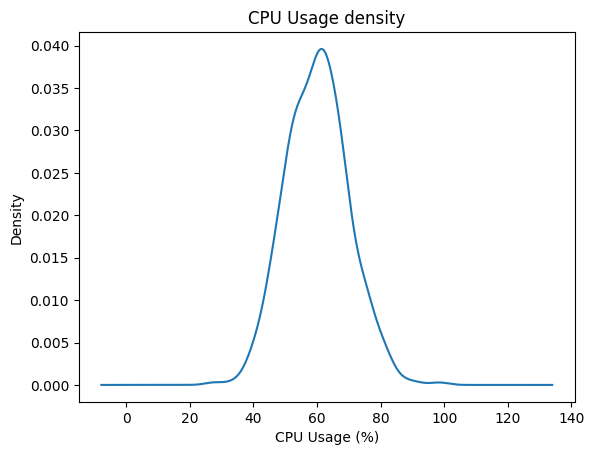

In [4]:
df['cpu_usage'].plot.kde(title='CPU Usage density')
plt.xlabel('CPU Usage (%)')
plt.show()

> Shows overall distribution of CPU usage across all hours.

### 2️⃣ KDE Plot by Time Filter (e.g., Only Daytime)

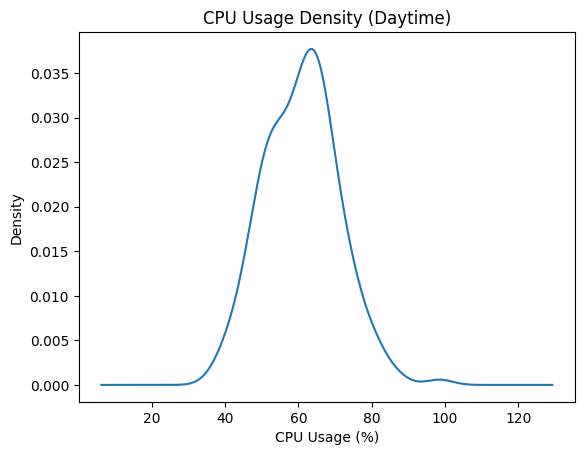

In [5]:
df['hour'] = df['timestamp'].dt.hour
day_df = df[(df['hour'] >= 9) & (df['hour'] <= 17)]

day_df['cpu_usage'].plot.kde(title='CPU Usage Density (Daytime)')
plt.xlabel("CPU Usage (%)")
plt.show()

> Helps detect usage patterns during business hours.

### 3️⃣ Comparing Distributions (e.g., Daytime vs Night)

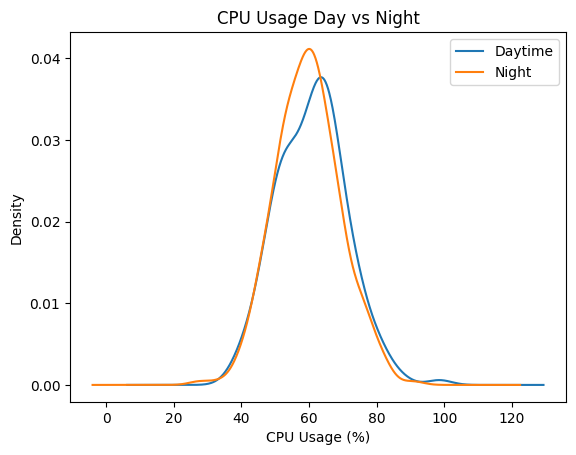

In [6]:
night_df = df[(df['hour'] < 9) | (df['hour'] > 17)]

day_df['cpu_usage'].plot.kde(label='Daytime', legend=True)
night_df['cpu_usage'].plot.kde(label='Night', legend=True, title='CPU Usage Day vs Night')
plt.xlabel("CPU Usage (%)")
plt.show()

> Easily compare how resource usage varies by time of day.

### 4️⃣ Aggregated KDE (by Hourly Mean)

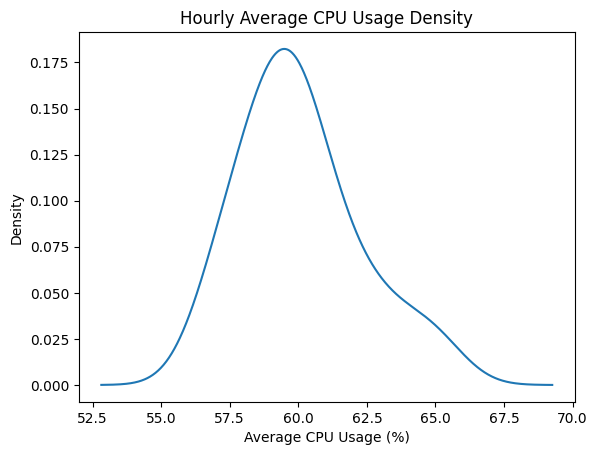

In [7]:
df_hourly = df.groupby(df['timestamp'].dt.hour)['cpu_usage'].mean()

df_hourly.plot.kde(title='Hourly Average CPU Usage Density')
plt.xlabel("Average CPU Usage (%)")
plt.show()

> Smooth curve shows the probability of typical hourly CPU usage values.

## ⚠️ 5. Common Pitfalls

| Pitfall                          | Explanation                                                      |
| -------------------------------- | ---------------------------------------------------------------- |
| ❌ Non-continuous data            | KDE is meant for continuous variables, not categories or strings |
| ❌ Small datasets                 | KDE can be unreliable with too few data points                   |
| ❌ Wrong bandwidth (`bw_method`)  | Too small → noisy; Too large → oversmoothed                      |
| ❌ Using with discrete timestamps | Convert time to numerical metrics (e.g., hour) for KDE           |


## 🌍 6. Real-World Examples & Use Cases

| Use Case               | Description                                                |
| ---------------------- | ---------------------------------------------------------- |
| **System Monitoring**  | Plot distribution of CPU/memory usage across the day       |
| **Retail Sales**       | Density of sales per hour or day                           |
| **Website Traffic**    | KDE of requests or visits over different time windows      |
| **Energy Usage**       | KDE of electricity consumption during weekdays vs weekends |
| **Temperature Trends** | Density plot of hourly temperature across seasons          |


### 🔚 Summary

* KDE plots give a smooth view of value **distributions**, ideal for time-based numeric data.
* Helps uncover **patterns**, **peaks**, and **anomalies** without binning like histograms.
* Works well for **time-filtered**, **grouped**, and **aggregated** data.


<center><b>Thanks</b></center>